In [60]:
# Make new datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

pd.set_option('display.width', 500)
data_file = '../data/dream4/insilico_size10_1_timeseries.tsv'
original_df = pd.read_csv(data_file, sep='\t')


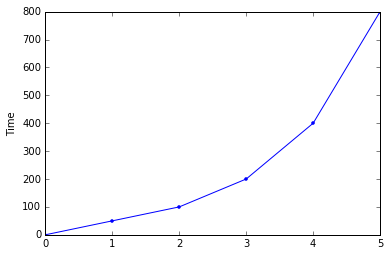

In [61]:
timepoints = list(set(original_df.Time))
timepoints.sort()
num_inc_points = 6
non_uniform_tp = [0.0] + [timepoints[2**ii] for ii in range(num_inc_points-1)]
plt.plot(non_uniform_tp, '.-')
plt.ylabel('Time')

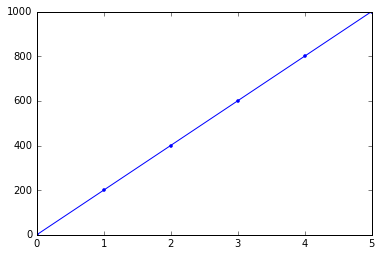

In [62]:
uniform_tp = [timepoints[4*ii] for ii in range(num_inc_points)]
plt.plot(uniform_tp, '.-')

In [63]:
uniform_df = original_df[original_df['Time'].isin(uniform_tp)]
nonuniform_df = original_df[original_df['Time'].isin(non_uniform_tp)]
print(original_df.head())
print(uniform_df.head())
print(nonuniform_df.head())

   Time        G1        G2        G3        G4        G5        G6        G7        G8        G9       G10
0     0  0.666511  0.127219  0.355065  0.774572  0.100430  0.275493  0.606785  0.743098  0.665637  0.695064
1    50  0.325775  0.121822  0.346411  0.722911  0.192459  0.310764  0.609696  0.756752  0.555414  0.732717
2   100  0.177501  0.044359  0.571289  0.586828  0.233350  0.356974  0.464732  0.665699  0.721103  0.671716
3   150  0.183885  0.061535  0.484977  0.633821  0.404510  0.337567  0.420007  0.732409  0.640227  0.697043
4   200  0.093069  0.139843  0.343555  0.535438  0.558332  0.299423  0.414539  0.677147  0.547874  0.751275
    Time        G1        G2        G3        G4        G5        G6        G7        G8        G9       G10
0      0  0.666511  0.127219  0.355065  0.774572  0.100430  0.275493  0.606785  0.743098  0.665637  0.695064
4    200  0.093069  0.139843  0.343555  0.535438  0.558332  0.299423  0.414539  0.677147  0.547874  0.751275
8    400  0.135856  0.118

In [126]:
# Make it into a function for future use
def make_subsamples(df, num_inc_points=7):
    timepoints = np.sort(np.array(list((set(original_df.Time)))))
    spacing = int(np.floor(len(timepoints)/num_inc_points))
    uniform_tp = timepoints[[spacing*ii for ii in range(num_inc_points)]]
    non_uniform_tp = np.logspace(0,np.log2(spacing*(num_inc_points-1)),num_inc_points,base=2).astype(int)
    non_uniform_tp[0] = timepoints[0]
    non_uniform_tp = timepoints[non_uniform_tp]
    uniform_df = original_df[original_df['Time'].isin(uniform_tp)]
    nonuniform_df = original_df[original_df['Time'].isin(non_uniform_tp)]
    return uniform_df, nonuniform_df

a, b = make_subsamples(original_df, 7)

In [134]:
insilico_nets = 5
u_path = '../data/dream4/uniform_sampling/'
nu_path = '../data/dream4/nonuniform_sampling/'
for net in range(1,insilico_nets+1):
    open_path = '../data/dream4/insilico_size10_%i_timeseries.tsv' %net
    raw_df = pd.read_csv(open_path, sep='\t')
    u_df, nu_df = make_subsamples(raw_df)
    u_df.to_csv((u_path+'uniform_sampling'+open_path.split('/')[-1]), sep='\t')
    nu_df.to_csv((nu_path+'nonuniform_sampling'+open_path.split('/')[-1]), sep='\t')